In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [2]:
# Artificial dataset

np.random.seed(seed=42)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X_set1 = np.concatenate([f0, f1])
y_set1 = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [3]:
X_set1_train, X_set1_val, y_set1_train, y_set1_val = train_test_split(X_set1, y_set1, train_size=0.8)
print("Train dataset -- Rows: {}, Columns: {}".format(X_set1_train.shape[0], X_set1_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(X_set1_val.shape[0], X_set1_val.shape[1]))

Train dataset -- Rows: 400, Columns: 2
Test dataset -- Rows: 100, Columns: 2


In [4]:
sc = StandardScaler()
X_set1_train = sc.fit_transform(X_set1_train)
X_set1_val = sc.fit_transform(X_set1_val)

In [5]:
#Kernel Function (Linear)

def _kernel_function(X1, X2, gamma=1, theta=0, d=1):
        """
        Compute a linear kernal function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          First feature vector

        X : The following forms of ndarray, shape (n_samples, n_features)
          Second feature vector

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result kernel function

        """
        
        kernel = (gamma*np.dot(X1, X2.T) + theta)**d 

        return kernel

In [6]:
kernel_temp = _kernel_function(np.array(X_set1_train)[0], np.array(X_set1_train)[1])
print(kernel_temp)

1.383557919267866


In [7]:
#Larange Steepest Descent
def _lambda_steepest_descent(X, y, lr):
        """
        Calculate the larange multiplier using its hypothesis function
        Parameters
        ----------
        X: The following form of ndarray, shape (n_samples, n_features)
            Features of training data
        
        y: The following form of ndarray, shape(n_samples,)
            Label for value of training data
        
        Returns
        -------
        lambda_val: The following form of ndarray, shape (n_samples, 1)
            Estimated larange multiplier value
        """
        lambda_val = np.random.randn(len(X))

        for i in range(len(X)):
            update_val = np.dot(lambda_val * y[i] * y.T, _kernel_function(X[i], X))
            lambda_val[i] += lr * (1 - update_val)
            lambda_val = np.where(lambda_val >=0, lambda_val, 0)

        return lambda_val

In [8]:
lambda_test = _lambda_steepest_descent(X_set1_train, y_set1_train, 0.01)
print("The lambda value greater than 0: \n {}".format(lambda_test[lambda_test > 0]))

The lambda value greater than 0: 
 [1.49276642e+00 7.50698061e-01 2.72247092e-02 3.89944324e-02
 4.34979167e-01 1.19600837e-01 1.46031977e+00 2.31433655e-01
 8.54569730e-01 5.68106349e-01 1.95977067e-01 1.13408373e-03
 1.26707040e-01 7.57576974e-01 9.51932738e-02 3.32596303e-01
 6.85510339e-01 6.06296055e-02 3.25877058e-01 6.54516801e-01
 1.01664387e+00 3.48934612e-01 1.78105929e-01 1.50387097e-01
 7.49754795e-02 2.92323674e-01 1.44598348e-01 9.00162631e-01
 1.12226583e+00 1.20438075e-01 4.92464456e-02 3.01995288e-01
 1.05552572e+00 4.30602191e-01 4.74428572e-01 1.29177599e+00
 5.76329939e-01 7.03550627e-01 5.33997283e-01 8.54540965e-03
 6.55487519e-01 4.91852912e-01 8.12932651e-01 2.58338553e-01
 9.42408434e-01 2.88298476e-01 6.68559126e-02 1.12150239e+00
 8.23563358e-01 6.82592656e-01 6.11443314e-01 1.46683813e+00
 3.24867576e-01 8.76915262e-01 4.85790727e-01 7.34632993e-01
 8.65795752e-02]


In [9]:
#Support Vector Determination

def get_support_vector(X, Y, lambda_val, threshold):
        
        """
        Get the support vectors that satisfy with the threshhold

        """
        index_support_vectors = np.where(lambda_val > threshold)
        lambda_sv = lambda_val[lambda_val > threshold]
        X_sv = X[lambda_val > threshold]
        Y_sv = Y[lambda_val > threshold]
        n_support_vectors = len(X_sv)

        return X_sv, Y_sv, lambda_sv

In [10]:
X_sv_test, Y_sv_test, lambda_sv_test = get_support_vector(X_set1_train, y_set1_train, lambda_test, 1e-3)
for i in range (X_sv_test.shape[0]):
  print("Support vector X: {} -- Suport vector label: {} -- Suport vector lambda: {}".format(np.around(X_sv_test[i],2), Y_sv_test[i], lambda_sv_test[i]))
     

Support vector X: [ 1.57 -0.58] -- Suport vector label: -1 -- Suport vector lambda: 1.4927664214078304
Support vector X: [-0.74  0.68] -- Suport vector label: 1 -- Suport vector lambda: 0.7506980610639018
Support vector X: [-1.42 -0.27] -- Suport vector label: 1 -- Suport vector lambda: 0.02722470917409181
Support vector X: [ 0.74 -1.08] -- Suport vector label: -1 -- Suport vector lambda: 0.038994432354496844
Support vector X: [ 1.02 -0.39] -- Suport vector label: -1 -- Suport vector lambda: 0.43497916720285
Support vector X: [ 0.56 -0.5 ] -- Suport vector label: -1 -- Suport vector lambda: 0.11960083685741507
Support vector X: [ 0.15 -1.05] -- Suport vector label: -1 -- Suport vector lambda: 1.4603197725314279
Support vector X: [-0.35  0.79] -- Suport vector label: 1 -- Suport vector lambda: 0.23143365466528398
Support vector X: [ 1.07 -0.47] -- Suport vector label: -1 -- Suport vector lambda: 0.854569730453546
Support vector X: [ 1.18 -0.88] -- Suport vector label: -1 -- Suport vecto

In [11]:
# Number of support vector
print("Number of support vector: {}".format(len(X_sv_test)))

Number of support vector: 57


In [12]:
# Threshold parameters
threshold = [1e-5, 1e-4, 1e-3, 1e-2, 0.05, 0.1, 1, 5, 10]

for i, margin_threshold in enumerate(threshold):
    X_sv_test, Y_sv_test, lambda_sv_test = get_support_vector(X_set1_train, y_set1_train, lambda_test, margin_threshold)
    # Number of support vector
    print("Number of support vector: {}".format(len(X_sv_test)))

Number of support vector: 57
Number of support vector: 57
Number of support vector: 57
Number of support vector: 55
Number of support vector: 52
Number of support vector: 47
Number of support vector: 8
Number of support vector: 0
Number of support vector: 0


In [13]:
def predict(X, lambda_sv, X_sv, Y_sv):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = 0

        y_pred = np.dot(lambda_sv * Y_sv, _kernel_function(X, X_sv).T)

        final_pred = np.where(y_pred >= 0, 1, -1)

        return final_pred

In [14]:
y_test_pred = predict(X_set1_val, lambda_sv_test, X_sv_test, Y_sv_test)
print("The predicted labels: {}".format(y_test_pred))

The predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_set1_val, y_test_pred)))

Accuracy: 0.5


In [16]:
#SVM Class


class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lambda_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, gamma=1, d=1, theta=0, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr  
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta = theta
        self.d = d

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.X = X
        self.Y = y

        m, n = X.shape
        self.lambda_val = np.random.rand(m)

        for i in range(self.iter):
            final_lambda = self._lambda_steepest_descent(X, y)
            if verbose:
              if (i % 10 == 0):
                print("Iteration {}".format(i))
            

        self.get_support_vector()

      
    def _lambda_steepest_descent(self, X, y):
        """
        Calculate the larange multiplier using its hypothesis function
        Parameters
        ----------
        X: The following form of ndarray, shape (n_samples, n_features)
            Features of training data
        
        y: The following form of ndarray, shape(n_samples,)
            Label for value of training data
        
        Returns
        -------
        lambda_val: The following form of ndarray, shape (n_samples, 1)
            Estimated larange multiplier value
        """
  
        for i in range(len(X)):
            update_val = np.dot(self.lambda_val * y[i] * y.T, self._kernel_function(X[i], X))
            self.lambda_val[i] += self.lr * (1 - update_val)
            self.lambda_val = np.where(self.lambda_val >=0, self.lambda_val, 0)

        return self.lambda_val
        

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = np.dot(self.lambda_sv * self.Y_sv, self._kernel_function(X, self.X_sv).T)

        final_pred = np.where(y_pred >= 0, 1, -1)

        return final_pred

    def get_support_vector(self):
        
        """
        Get the support vectors that satisfy with the threshhold

        """
        
        self.index_support_vectors = np.where(self.lambda_val > self.threshold)
        self.lambda_sv = self.lambda_val[self.lambda_val > self.threshold]
        self.X_sv = self.X[self.lambda_val > self.threshold]
        self.Y_sv = self.Y[self.lambda_val > self.threshold]
        self.n_support_vectors = len(self.X_sv)

        return self.X_sv, self.Y_sv, self.lambda_sv
        

    def _kernel_function(self, X1, X2):
        """
        Compute a linear kernal function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          First feature vector

        X : The following forms of ndarray, shape (n_samples, n_features)
          Second feature vector

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result kernel function

        """
        if self.kernel == 'poly':
          self.gamma = 1
          self.theta = np.random.uniform(low=-1, high = 1, size=(1))
          self.d = 2
        
        # We use the same format for both lienar and poly for easier interpretion
        kernel = (self.gamma*np.dot(X1, X2.T) + self.theta)**self.d 

        return kernel

In [17]:
# Hyperparameters setting
iter = 100
lr = 0.01
verbose = True

scratch_svm_model = ScratchSVMClassifier(iter, lr, True)
scratch_svm_model.fit(X_set1_train, y_set1_train)

Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Use the predict for the predicted labels
y_pred = scratch_svm_model.predict(X_set1_val)

# Testing out the metrics
acc_score = accuracy_score(y_set1_val, y_pred)
prec_score = precision_score(y_set1_val, y_pred)
rec_score = recall_score(y_set1_val, y_pred)
f_score = f1_score(y_set1_val, y_pred)
conf_matrix = confusion_matrix(y_set1_val, y_pred)
print("Accuracy score: {}\n Precision score: {}\n Recall score: {}\n F1 score: {}\n Confusion matrix: \n{}".format(acc_score, prec_score, rec_score, f_score, conf_matrix))
    

Accuracy score: 1.0
 Precision score: 1.0
 Recall score: 1.0
 F1 score: 1.0
 Confusion matrix: 
[[50  0]
 [ 0 50]]


<Axes: >

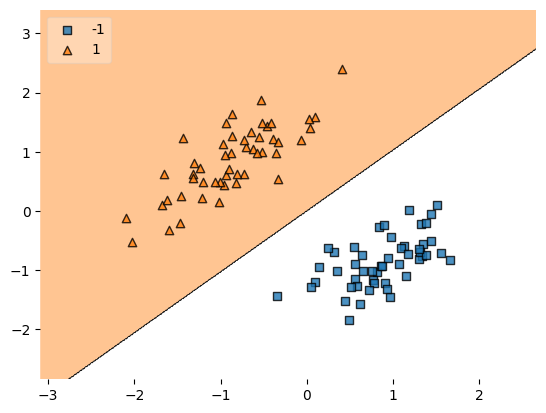

In [19]:
# Visualization of decision area
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_set1_val, y_set1_val, clf=scratch_svm_model,legend=2)

In [20]:
#Using decision region plotting scratch
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['tab:red', 'tab:blue']
    contourf_color = ['darkred', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    c = plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=plt.cm.rainbow)
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='darkblue', linewidths=1.5, alpha=0.8)
    plt.colorbar(c)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=30, cmap=plt.cm.coolwarm, label=target_names[i], marker='o', edgecolors='k')


    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=30, label='support vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

C:\Users\batmunkh.ERDENETMC\AppData\Local\Temp\ipykernel_25496\1304067639.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=30, cmap=plt.cm.coolwarm, label=target_names[i], marker='o', edgecolors='k')


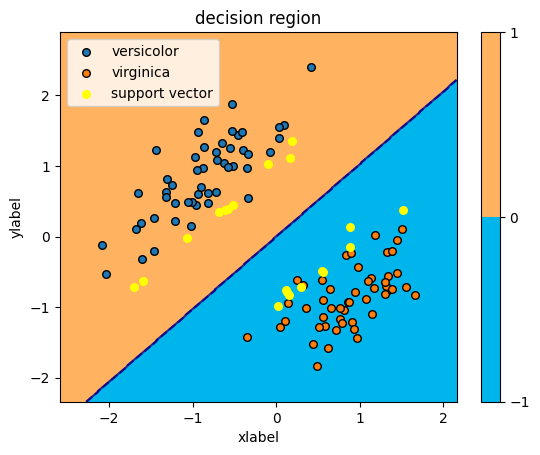

In [21]:
decision_region(X_set1_val, y_set1_val, scratch_svm_model)